In [1]:
pip install pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('grosir.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data_numeric = data.drop(['Channel', 'Region'], axis=1)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)
data_scaled = pd.DataFrame(data_scaled, columns=data_numeric.columns)

C:\Users\Indah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Indah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Indah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Indah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

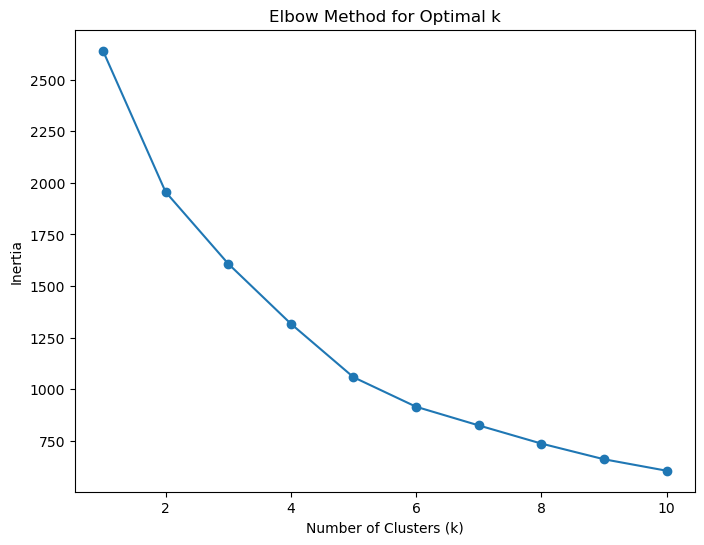

In [5]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

C:\Users\Indah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Indah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [7]:
data['Cluster'] = kmeans.labels_

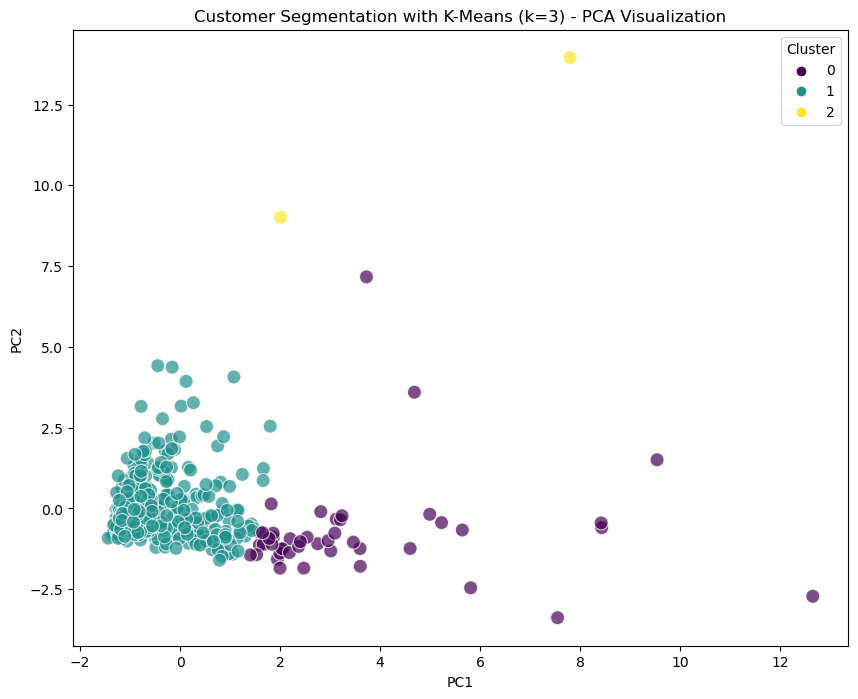

In [8]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
data_pca['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=data_pca, palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segmentation with K-Means (k=3) - PCA Visualization')
plt.show()

          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.977778  2.511111  10440.933333  19386.422222  28656.088889   
1        1.249364  2.547074  12062.913486   4115.099237   5534.966921   
2        1.000000  2.500000  34782.000000  30367.000000  16898.000000   

               Frozen  Detergents_Paper    Delicassen  
Cluster                                                
0         2190.244444      13327.800000   2374.200000  
1         2940.676845       1696.170483   1299.114504  
2        48701.500000        755.500000  26776.000000  


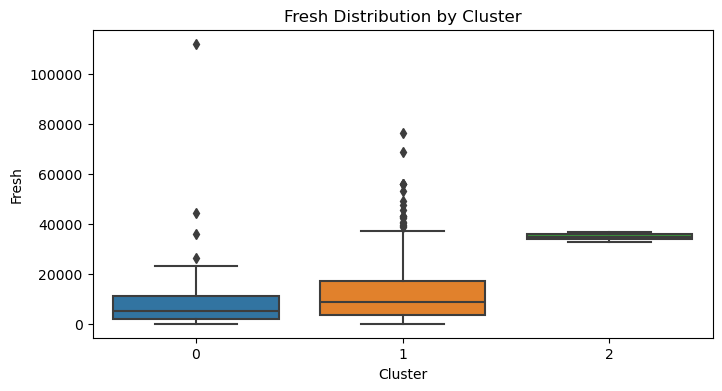

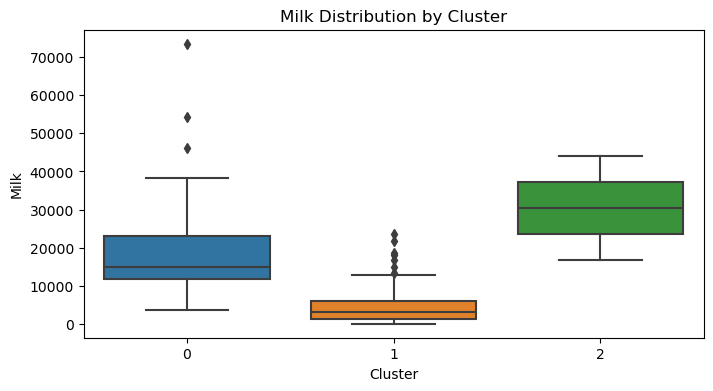

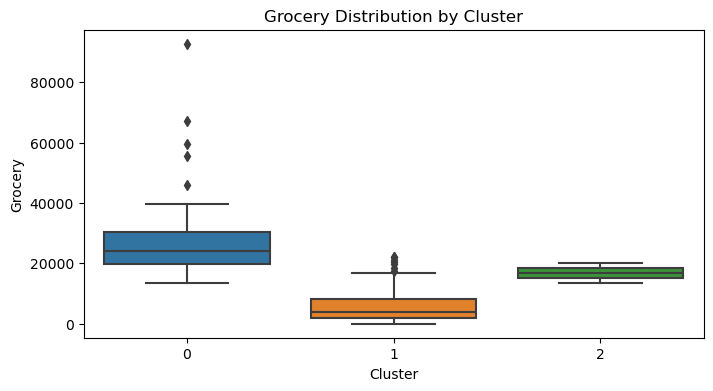

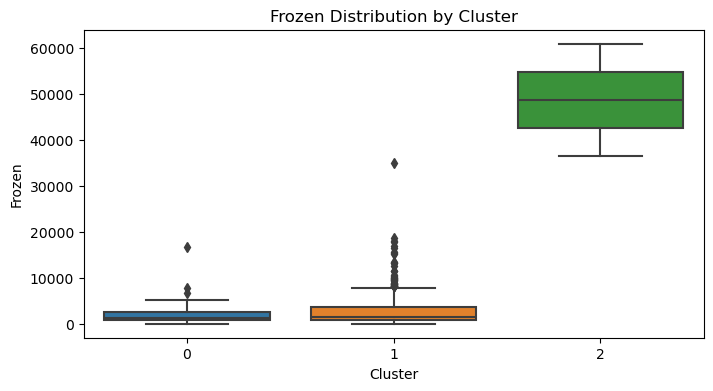

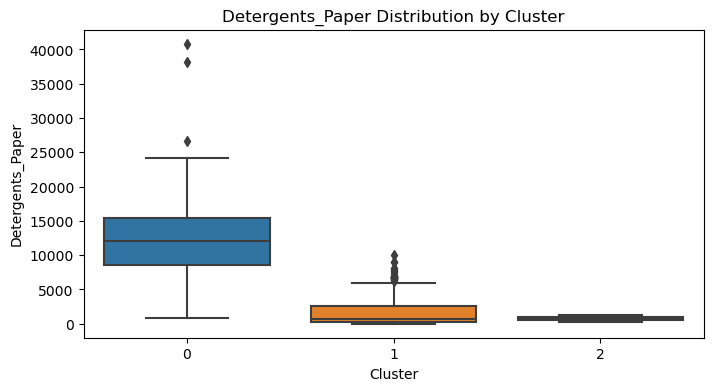

ValueError: Could not interpret input 'Delicatessen'

<Figure size 800x400 with 0 Axes>

In [9]:
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

for column in ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Cluster', y=column, data=data)
    plt.title(f'{column} Distribution by Cluster')
    plt.show()